# Bag of Words Meets Bags of Popcorn: Use Google's Word2Vec for movie reviews

## Introduction

The purpose of this project is to understand the sentiments behind IBDM movie reviews. Sentiment analysis is a challenging topic in machine learning. The way people express their emotions can often be obscured by ambiguity, pun words, and sarcasm, which can eventually mislead both humans and computers. 

The approach we will take to reach our goal is to use Google's Word2Vec, a deep-learning method that investigates on the meaning behind words. Firstly, we will load and clean the 25,000 IMDB movie review, then apply a simple natural language processing model called Bag of Words to get predictions on whether the review is positive or negative. 

The most important results we found are the following:
- The model initially scored 0.79824 in prediction accuracy. The gfeature engineering techniques used included: removing HTML markups, punctuations, numbers, and stopwords.
- The model eventually reached a 0.84412 accuracy score. This might be because Porter Stemming, an additional feature engineering technique, was used to train the model. However, it must be mentioned that this result is not statistically significant. Every model comes with a degree of randomness, and this might be the actual reason why there has been a slight increase in the final score.  
- Further steps to improve the accuracy estimation process include but are not limited to: training the model numerous times, using different random seeds, using different shuffling of the training and testing data, and get an estimate of the mean performance and the standard deviation performance. 
- Other feature engineering techniques to use can be: cleaning the reviews in an alternative way, choosing other number of vocabulary words for the Bag of Words representation, or using another classifier. 

## Reading in the Data

Let's go ahead and tidy up the text of our movie reviews for machine learning. As of now, we'll remove HTML tags such as abbreviations and punctuations.

In [1]:
from bs4 import BeautifulSoup  
from IPython.display import Image, display
import nltk
from nltk.corpus import stopwords
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Reading in the data
train = pd.read_csv("/Users/giorgiadimiccoli/Desktop/repos/my_projects/data/bags_of_popcorn/word2vec-nlp-tutorial/labeledTrainData.tsv.zip", header=0, \
                    delimiter="\t", quoting=3) # header set as 0 since first line contains column names; quoting=3 tells Python to ignore doubled quotes to prevent errors 

In [3]:
# Exploring the movie reviews
print(train['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

## Data Cleaning and Text Preprocessing
### Removing HTML Markup: The BeautifulSoup Package

In [4]:
# Removing HTML markups 
example1 = BeautifulSoup(train["review"][0]) # Initializing the BeautifulSoup object on a single movie review     

# Printing the raw review and then the output of get_text() for comparison
print(train["review"][0])
print(example1.get_text()) # get_text gives us the text of the review without any tags or markups 

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

Now that we've tidied up the reviews, we can carry on with our data cleansing by dealing with numbers, uppercase letters, and stopwords. 

### Dealing with Punctuation, Numbers and Stopwords: NLTK and regular expressions

In [5]:
# Using regular expressions to do a find-and-replace
letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                   # The pattern to replace it with
                      example1.get_text() )  # The text to search
print(letters_only)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [6]:
# Converting movie reviews to lower case and splitting them into individual words (i.e., tokenisation)
lower_case = letters_only.lower()        # Convert to lower case
words = lower_case.split()               # Split into words

In [7]:
# Getting a list of stop words 
print(stopwords.words("english")) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
# Removing stop words from "words"
words = [w for w in words if not w in stopwords.words("english")]
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [9]:
# Removing duplicates from "words" and sorting them in alphabetical order 
new_list = list(sorted(set(words)))
print(new_list)

['actual', 'alone', 'also', 'another', 'anyway', 'attention', 'away', 'bad', 'behind', 'bestest', 'beyond', 'biography', 'bit', 'boring', 'bottom', 'buddy', 'bunch', 'call', 'came', 'car', 'certain', 'character', 'cinema', 'closed', 'complex', 'consenting', 'convincing', 'cool', 'course', 'criminal', 'dance', 'dead', 'demon', 'different', 'director', 'directors', 'documentary', 'doors', 'drug', 'drugs', 'dunno', 'egotist', 'eighties', 'either', 'etc', 'ever', 'excluding', 'extremely', 'fact', 'fans', 'feature', 'feeling', 'film', 'filming', 'finally', 'find', 'gave', 'get', 'girl', 'give', 'going', 'grace', 'guilty', 'guy', 'hate', 'hates', 'hmmm', 'hope', 'impressive', 'innocent', 'insight', 'ironically', 'jackson', 'joe', 'kay', 'kid', 'kiddy', 'know', 'latter', 'let', 'level', 'liars', 'like', 'line', 'listening', 'lord', 'lots', 'made', 'make', 'making', 'may', 'maybe', 'message', 'messages', 'michael', 'mind', 'minutes', 'mj', 'moment', 'moonwalker', 'movie', 'music', 'must', 'nah

### Putting it all together

Now that we've dealt with numbers, uppercase letters, and stopwords, we can create a function that combines all these actions together so that we can apply them on each move reviews and create a string of words. We'll do that by initiating a for loop. 

In [10]:
# Creating a function that converts a raw review into a string of words 
def review_to_words(raw_review):
    
    # Removing HTML
    review_text = BeautifulSoup(raw_review).get_text() # get_text gives us the text of the review without any tags or markups 
    
    # Removing non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    # Converting to lower case and splitting into individual words
    words = letters_only.lower().split()                             
    
    # Converting the stop words to a set
    stops = set(stopwords.words("english")) # searching a set is much faster than searching a list since it removes duplicates
    
    # Removing stop words
    meaningful_words = [w for w in words if not w in stops]  
        
    # Joining the words back into one string separated by space
    return(" ".join(meaningful_words)) # making the output easier to use in our Bag of Words 

In [11]:
# Calling the function for a single review
clean_review = review_to_words(train["review"][0])
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [12]:
# Getting the number of reviews based on the dataframe column size
num_reviews = train["review"].size

# Initializing an empty list to hold the cleansed reviews
print("Cleaning and parsing the training set movie reviews...\n") # this will make the output easier to use in our Bag of Words 
clean_train_reviews = [] 

# Looping over each review
for i in range(0, num_reviews): # creating an index i that goes from 0 to the length of the movie review list
    if( (i+1)%1000 == 0): # if the index is evenly divisible by 1000, print a message
        print("Review %d of %d\n" % ( i+1, num_reviews )) # printing a status update to avoid annoyances 
    # Calling our function for each one, and appending the result to the list of cleansed reviews 
    clean_train_reviews.append(review_to_words(train["review"][i])) 

Cleaning and parsing the training set movie reviews...



/opt/homebrew/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



## Creating Features from a Bag of Words

Now that we've cleansed our movie reviews, we need to find a way to make them 'machine-learning' readable. One way is to use Bags of Words, which is a method that turns natural language sentences into a set of numbers. Firstly, this method creates a vocabulary, which contains all the unique words in the movie reviews. For each sentence, it goes through each word and counts how many times that word occurs in the sentence. This will result in a set of numbers for that sentence, which will be fed into the machine learning model for it to predict whether that sentence is positive or negative. This set of numbers is called feature vector. We'll now use this method for our IMDB movie reviews.

In [13]:
print("Creating the bag of words...\n")

# Instantiating the "CountVectorizer" object which learns a vocabulary and transforms other data using the vocabulary into feature vectors
vectorizer = CountVectorizer(analyzer = "word", \
                            tokenizer = None,  \
                            preprocessor = None, \
                            stop_words = None, \
                            max_features = 5000)
 
# 1) Fitting the model and learning the vocabulary; 
# 2) Transforming the training data (using the vocabulary just learnt) into feature vectors
train_data_features = vectorizer.fit_transform(clean_train_reviews) # the input is a list of strings 
                             
# Converting the result into an np.array since it is easier to work with
train_data_features = train_data_features.toarray()

Creating the bag of words...



We can note from the code cell above that CountVectorizer can automatically do preprocessing, tokenisation, and stop word removal. However, we wanted to create our own function to practice data cleansing techniques step by step.

In [14]:
# Seeing how the training data array looks like
print(train_data_features.shape)

(25000, 5000)


In [15]:
# Taking a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()

# Outputting only the first ten words in the vocabulary
vocab[:10]

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandoned',
 'abc',
 'abilities',
 'ability',
 'able',
 'abraham',
 'absence',
 'absent',
 'absolute',
 'absolutely']

In [16]:
# Checking how the featured vectors for each movie review look like
print(train_data_features)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Training the Random Forest Model

In [17]:
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initializing a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fitting the forest to the training set using the bag of words as features and the sentiment labels as the response variable
forest = forest.fit(train_data_features, train["sentiment"])

Training the random forest...


## Creating a Submission

Now we're ready to run the trained Random Forest classifier on our test set to create a submission file to upload on Kaggle. Let's go ahead and cleanse and parse the movie reviews in the test set first.

In [18]:
# Reading in the test data
test_data = pd.read_csv("/Users/giorgiadimiccoli/Desktop/repos/my_projects/data/bags_of_popcorn/word2vec-nlp-tutorial/testData.tsv.zip", header=0, \
                    delimiter="\t", quoting=3) # header set as 0 since first line contains column names; quoting=3 tells Python to ignore doubled quotes to prevent errors 

In [19]:
# Taking a look at the test data
test_data

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."
...,...,...
24995,"""2155_10""","""Sony Pictures Classics, I'm looking at you! S..."
24996,"""59_10""","""I always felt that Ms. Merkerson had never go..."
24997,"""2531_1""","""I was so disappointed in this movie. I am ver..."
24998,"""7772_8""","""From the opening sequence, filled with black ..."


In [20]:
# Cleansing and parsing movie reviews in the test set

# Selecting only the reviews from the test data set
num_reviews = len(test_data['review']) 

# Creating an empty list to store the clean test reviews
clean_test_reviews = [] 

# Iterating through each review 
print("Cleaning and parsing the test set movie reviews...\n")
for i in range(0, num_reviews):
    # Creating an index i that goes from 0 to the length of the movie review list
    if((i+1) % 1000 == 0): # if the index is evenly divisible by 1000, print a message
        print("Review %d of %d\n" % (i+1, num_reviews)) # printing a status update to avoid annoyances 
    # Calling our function for each one, and appending the result to the list of cleansed reviews 
    clean_review = review_to_words(test_data['review'][i])
    clean_test_reviews.append(clean_review)

Cleaning and parsing the test set movie reviews...



/opt/homebrew/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



In [21]:
# Getting a bag of words for the test set and converting it to a numpy array 
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

In [22]:
# Making sentiment label predictions with the Random Forest classifier we previously trained
result = forest.predict(test_data_features)

In [23]:
# Copying the results to a pandas dataframe 
output = pd.DataFrame(data={"id":test_data["id"], "sentiment":result})

In [24]:
# Writing the comma-separated output file through pandas
output.to_csv("Bag_of_words_model.csv", index=False, quoting=3)

## Initial Results

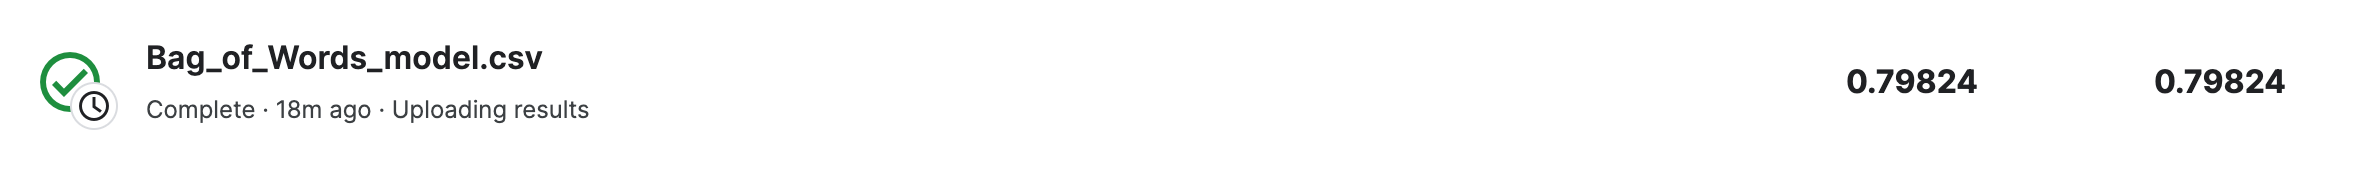

In [26]:
display(Image(filename='bag_of_words_results_1.png'))

Our trained model is scoring 0.79824 in prediction accuracy. Let's try to explore more feature engineering techniques and see if we can improve the score. One thing that we could do is apply Porter Stemming. This is a natural language processing technique used to treat words such as "messages", "message", and "messaging" as the same word. Let's try to apply this technique to our dataset. 

## Feature Engineering: Implementing Porter Stemming

In [28]:
# Normalising words to shorten the lookup
from nltk.stem.porter import *

ps = PorterStemmer() # assigning the PorterStemmer to a variable named ps 

stemmed_list = []

for word in words:
    stemmed_word = ps.stem(word)
    stemmed_list.append(stemmed_word)

In [29]:
print(stemmed_list)

['stuff', 'go', 'moment', 'mj', 'start', 'listen', 'music', 'watch', 'odd', 'documentari', 'watch', 'wiz', 'watch', 'moonwalk', 'mayb', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'realli', 'cool', 'eighti', 'mayb', 'make', 'mind', 'whether', 'guilti', 'innoc', 'moonwalk', 'part', 'biographi', 'part', 'featur', 'film', 'rememb', 'go', 'see', 'cinema', 'origin', 'releas', 'subtl', 'messag', 'mj', 'feel', 'toward', 'press', 'also', 'obviou', 'messag', 'drug', 'bad', 'kay', 'visual', 'impress', 'cours', 'michael', 'jackson', 'unless', 'remot', 'like', 'mj', 'anyway', 'go', 'hate', 'find', 'bore', 'may', 'call', 'mj', 'egotist', 'consent', 'make', 'movi', 'mj', 'fan', 'would', 'say', 'made', 'fan', 'true', 'realli', 'nice', 'actual', 'featur', 'film', 'bit', 'final', 'start', 'minut', 'exclud', 'smooth', 'crimin', 'sequenc', 'joe', 'pesci', 'convinc', 'psychopath', 'power', 'drug', 'lord', 'want', 'mj', 'dead', 'bad', 'beyond', 'mj', 'overheard', 'plan', 'nah', 'joe', 'pesci', '

In [30]:
# Adding porter stemming to the cleansing function we initially created

# Creating a function that converts a raw review into a string of words 
def review_to_words(raw_review):
    
    # Removing HTML
    review_text = BeautifulSoup(raw_review).get_text() # get_text gives us the text of the review without any tags or markups 
    
    # Removing non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    # Converting to lower case and splitting into individual words
    words = letters_only.lower().split()                             
    
    # Converting the stop words to a set
    stops = set(stopwords.words("english")) # searching a set is much faster than searching a list since it removes duplicates
    
    # Removing stop words
    meaningful_words = [w for w in words if not w in stops]  
    
    # Normalising words to shorten the lookup
    final_list_of_words = []

    for word in meaningful_words:
        stemmed_word = ps.stem(word)
        final_list_of_words.append(stemmed_word)
        
    # Joining the words back into one string separated by space
    return(" ".join(final_list_of_words)) # making the output easier to use in our Bag of Words 

In [31]:
# Calling the function for a single review
clean_review = review_to_words(train["review"][0])
print(clean_review)

stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obviou messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay a

As we can see above, the function now takes in some text as input and outputs stemmed words. Let's now apply the function to the training dataset, create the bag of words, training the model, and making another submission to check if the model performs better. 

## Reapplying the New Cleansing Function to the Train Data

In [32]:
# Getting the number of reviews based on the dataframe column size
num_reviews_2 = train["review"].size

# Initializing an empty list to hold the cleansed reviews
print("Cleaning and parsing the training set movie reviews...\n") # this will make the output easier to use in our Bag of Words 
clean_train_reviews_2 = [] 

# Looping over each review
for i in range(0, num_reviews_2): # creating an index i that goes from 0 to the length of the movie review list
    if( (i+1)%1000 == 0): # if the index is evenly divisible by 1000, print a message
        print("Review %d of %d\n" % ( i+1, num_reviews )) # printing a status update to avoid annoyances 
    # Calling our function for each one, and appending the result to the list of cleansed reviews 
    clean_train_reviews_2.append(review_to_words(train["review"][i])) 

Cleaning and parsing the training set movie reviews...



/opt/homebrew/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



## Recreating Features from a Bag of Words

In [33]:
print("Creating the bag of words...\n")

# Instantiating the "CountVectorizer" object which learns a vocabulary and transforms other data using the vocabulary into feature vectors
vectorizer_2 = CountVectorizer(analyzer = "word", \
                            tokenizer = None,  \
                            preprocessor = None, \
                            stop_words = None, \
                            max_features = 5000)
 
# 1) Fitting the model and learning the vocabulary; 
# 2) Transforming the training data (using the vocabulary just learnt) into feature vectors
train_data_features_2 = vectorizer_2.fit_transform(clean_train_reviews_2) # the input is a list of strings 
                             
# Converting the result into an np.array since it is easier to work with
train_data_features_2 = train_data_features_2.toarray()

Creating the bag of words...



## Retraining the Random Forest Model

In [34]:
print("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initializing a Random Forest classifier with 100 trees
forest_2 = RandomForestClassifier(n_estimators = 100) 

# Fitting the forest to the training set using the bag of words as features and the sentiment labels as the response variable
forest_2 = forest_2.fit(train_data_features_2, train["sentiment"])

Training the random forest...


## Recreating a Submission

In [35]:
# Cleansing and parsing movie reviews in the test set

# Selecting only the reviews from the test data set
num_reviews_2 = len(test_data['review']) 

# Creating an empty list to store the clean test reviews
clean_test_reviews_2 = [] 

# Iterating through each review 
print("Cleaning and parsing the test set movie reviews...\n")
for i in range(0, num_reviews_2):
    # Creating an index i that goes from 0 to the length of the movie review list
    if((i+1) % 1000 == 0): # if the index is evenly divisible by 1000, print a message
        print("Review %d of %d\n" % (i+1, num_reviews)) # printing a status update to avoid annoyances 
    # Calling our function for each one, and appending the result to the list of cleansed reviews 
    clean_review_2 = review_to_words(test_data['review'][i])
    clean_test_reviews_2.append(clean_review_2)

Cleaning and parsing the test set movie reviews...



/opt/homebrew/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



In [37]:
# Regetting a bag of words for the test set and converting it to a numpy array 
test_data_features_2 = vectorizer_2.transform(clean_test_reviews_2)
test_data_features_2 = test_data_features_2.toarray()

In [38]:
# Making sentiment label predictions again with the retrained Random Forest classifier
result_2 = forest_2.predict(test_data_features_2)

In [39]:
# Copying the results to a pandas dataframe 
output_2 = pd.DataFrame(data={"id":test_data["id"], "sentiment":result_2})

In [41]:
# Writing the comma-separated output file through pandas
output_2.to_csv("Bag_of_words_model_2.csv", index=False, quoting=3)

# Final Results

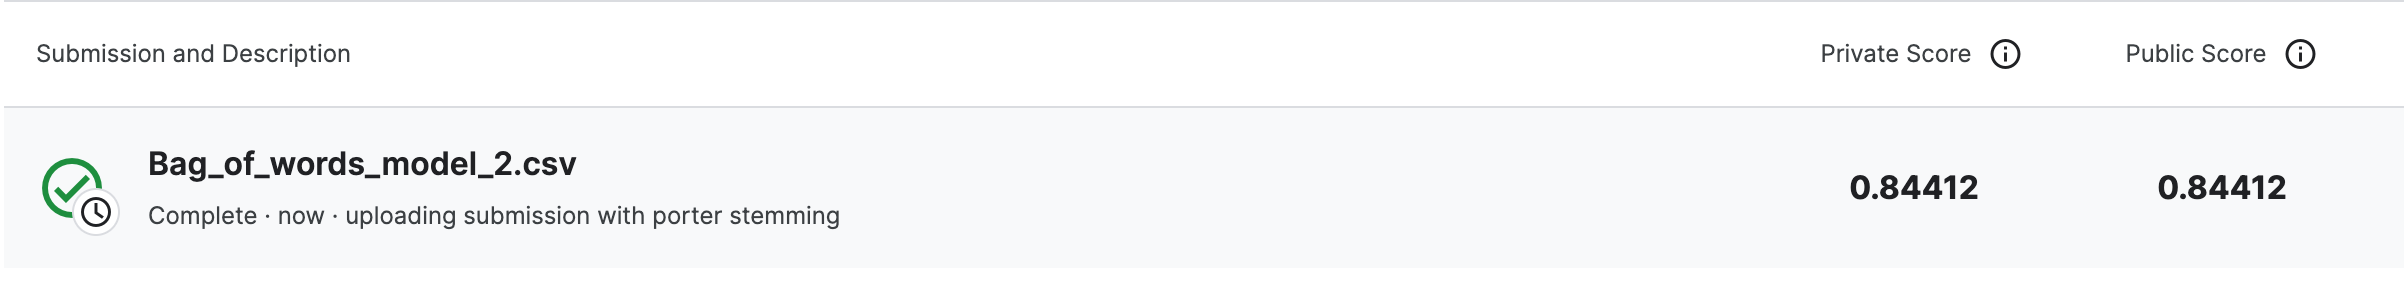

In [42]:
display(Image(filename='bag_of_words_results_2.png'))

It looks like our model improved from a score of 0.79824 to 0.84412! However, this is not a statistically significant improvement. Let's note that each model has a degree of randomness. As a next step to estimate proper performance, it would be advised to train the model five times with different random seeds, different shuffling of the training and testing data, and get an estimate of the mean performance and the standard deviation performance. 

# Conclusion

The purpose of this project was to understand the sentiments behind IBDM movie reviews. We used Google's Word2Vec, a deep-learning method that investigates on the meaning behind words. After having loaded and cleansed the 25,000 IMDB movie reviews, we applied simple natural language processing model called Bag of Words to get predictions on whether the reviews were positive or negative.

The most important results we found are the following:

- The model initially scored 0.79824 in prediction accuracy. The gfeature engineering techniques used included: removing HTML markups, punctuations, numbers, and stopwords.
- The model eventually reached a 0.84412 accuracy score. This might be because Porter Stemming, an additional feature engineering technique, was used to train the model. However, it must be mentioned that this result is not statistically significant. Every model comes with a degree of randomness, and this might be the actual reason why there has been a slight increase in the final score.
- Further steps to improve the accuracy estimation process include but are not limited to: training the model numerous times, using different random seeds, using different shuffling of the training and testing data, and get an estimate of the mean performance and the standard deviation performance.
- Other feature engineering techniques to use can be: cleaning the reviews in an alternative way, choosing other number of vocabulary words for the Bag of Words representation, or using another classifier.